In [1]:
import pandas as pd 

from porise.model.algorithms.cmab import BayesianHybridLinUCB
from porise.envs.real import ChainOfferEnvV2
from porise import Simulator

In [2]:
df = pd.read_csv('../porise/data/exp5217_all_imp100_scaled_train_new.csv')
print("cdna user features loaded")
df = df.set_index('easy_id')
user_map = df.T.to_dict('list')
print('get user map ready')

cdna user features loaded
get user map ready


In [3]:
# env = ChainOfferEnvV2(rat_log_path='../porise/data/reward_nov02_nov30_exp5217.csv', user_vectors_map=user_map)
env = ChainOfferEnvV2(rat_log_path='../porise/data/sampled_rat_log_exp5217.csv', user_vectors_map=user_map)

In [4]:
print(env.arm_feat_dim, env.user_feat_dim)

8 143


In [5]:
model = BayesianHybridLinUCB(n_arms=env.n_arms,
              alpha=2,
              arm_feat_dim=env.arm_feat_dim,
              user_feat_dim=env.user_feat_dim,
              return_list=False)

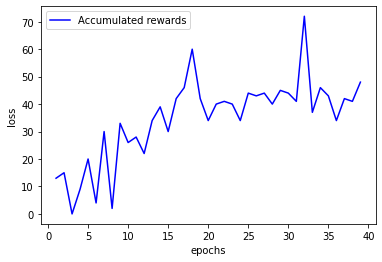

400000it [13:16, 502.13it/s, total reward=1390.0]                            


In [6]:
simulator = Simulator(model=model,
                     env=env,
                     train_every=int(10000),
                     throttle=int(1e2),
                     memory_capacity=int(10000),
                     plot_every=int(1e4))
simulator.run()

In [7]:
import numpy as np
np.save('results/sampled_log_BayesianHybridLinUCB_delay_10000.npy', simulator.rewards)

In [8]:
simulator.rewards.sum()

1391.0